trap_time: 71.19%
pte_cpy_time: 9.74%
pmd_cpy_time: 10.13%
tlb_flush_time: 8.94%


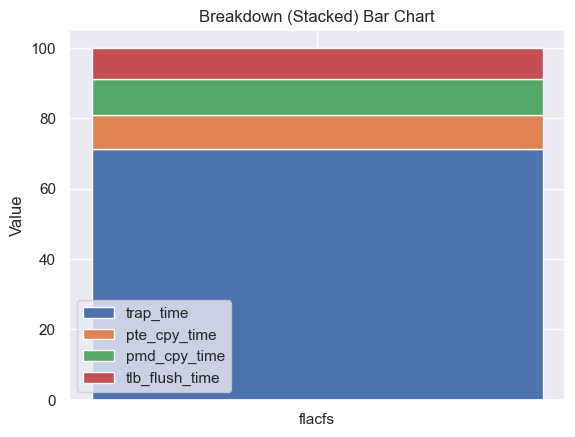

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
user_start_ns = 763334619473
kernel_start_ns = 763334622411
data_cpy_start_ns = 763334622837
data_cpy_end_ns = 763334623206
pte_cpy_start_ns = 763334623220
pte_cpy_end_ns = 763334623622
pmd_cpy_start_ns = 763334623637
pmd_cpy_end_ns = 763334624055
tlb_start_ns = 763334624098
tlb_end_ns = 763334624467
kernel_end_time_ns = 763334624482
user_end_ns = 763334630244


trap_time = kernel_start_ns - user_start_ns
pte_cpy_time = pte_cpy_end_ns - pte_cpy_start_ns
pmd_cpy_time = pmd_cpy_end_ns - pmd_cpy_start_ns
tlb_flush_time = tlb_end_ns - tlb_start_ns

total = trap_time + pte_cpy_time + pmd_cpy_time + tlb_flush_time
trap_time = trap_time / total * 100
pte_cpy_time = pte_cpy_time / total * 100
pmd_cpy_time = pmd_cpy_time / total * 100
tlb_flush_time = tlb_flush_time / total * 100

print(f"trap_time: {trap_time:.2f}%")
print(f"pte_cpy_time: {pte_cpy_time:.2f}%")
print(f"pmd_cpy_time: {pmd_cpy_time:.2f}%")
print(f"tlb_flush_time: {tlb_flush_time:.2f}%")
# 示例数据
labels = ['flacfs']
x = np.arange(len(labels))
part1 = [trap_time]
part2 = [pte_cpy_time]
part3 = [pmd_cpy_time]
part4 = [tlb_flush_time]

sns.set_theme()
# 堆叠柱状图
plt.bar(x, part1, label='trap_time')
plt.bar(x, part2, bottom=part1, label='pte_cpy_time')
plt.bar(x, part3, bottom=np.array(part1)+np.array(part2), label='pmd_cpy_time')
plt.bar(x, part4, bottom=np.array(part1)+np.array(part2)+np.array(part3), label='tlb_flush_time')

plt.xticks(x, labels)
plt.ylabel('Value')
plt.title('Breakdown (Stacked) Bar Chart')
plt.legend()
plt.show()